<a href="https://colab.research.google.com/github/raulbenitez/curso_Cementos_Molins/blob/main/how_many_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Model Clustering

We model the distribution of the multidimensional observations using a mixture of gaussian distributions: 

# $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma)$
# $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

<Figure size 864x864 with 0 Axes>

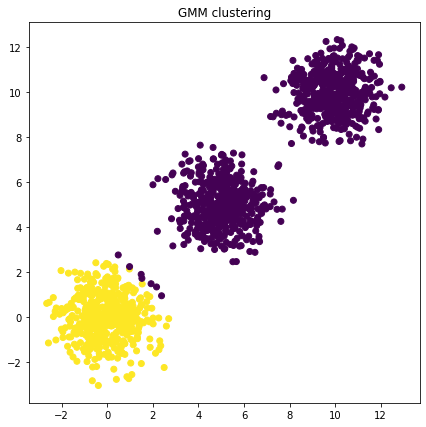

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5),(10,10)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

How many clusters are there in my data? 

In [10]:
#calcula el BIC per trobar el número de gaussianes òptim
NMAX = 10
bic = []
aic = []

for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG).fit(X)
    bic.append(gmm.bic(X)) #cada cop va afegint el bic amb kG+1, així ho tens tot en un vector i pots calcualr el mínim
    aic.append(gmm.aic(X)) #cada cop va afegint el bic amb kG+1, així ho tens tot en un vector i pots calcualr el mínim

print(bic)
print(aic)


idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))

[13747.553613276526, 12945.893363549989, 11744.648653716047, 11781.320123518582, 11820.804445045245, 11867.359129733208, 11896.399571720982, 11945.025105728942, 11983.780045579892, 12022.186318298127]
[13720.987511341074, 12887.447939291995, 11654.323907135513, 11659.116054615506, 11666.721053819627, 11681.396416185047, 11678.55753585028, 11695.303747535698, 11702.179365064105, 11708.7063154598]
...and the winner is GMM model G = 3
